# Preprocess CRC data

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import InSituData, InSituExperiment, CACHE
import scanpy as sc
from tqdm import tqdm
import anndata

## Load reference

In [41]:
ref_path = Path("/dss/dssfs02/lwp-dss-0001/pn57fo/pn57fo-dss-0000/datasets/scRNAseq_CRC_atlas/core_atlas-adata.h5ad")

In [4]:
reference = sc.read(ref_path)

In [5]:
reference

AnnData object with n_obs × n_vars = 4264929 × 28476
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enrichment_cell_

In [6]:
reference

AnnData object with n_obs × n_vars = 4264929 × 28476
    obs: 'dataset', 'medical_condition', 'cancer_type', 'sample_id', 'sample_type', 'tumor_source', 'replicate', 'sample_tissue', 'anatomic_region', 'anatomic_location', 'tumor_stage', 'tumor_stage_TNM', 'tumor_stage_TNM_T', 'tumor_stage_TNM_N', 'tumor_stage_TNM_M', 'tumor_size', 'tumor_dimensions', 'tumor_grade', 'histological_type', 'microsatellite_status', 'mismatch_repair_deficiency_status', 'MLH1_promoter_methylation_status', 'MLH1_status', 'KRAS_status', 'BRAF_status', 'APC_status', 'TP53_status', 'PIK3CA_status', 'SMAD4_status', 'NRAS_status', 'MSH6_status', 'FBXW7_status', 'NOTCH1_status', 'MSH2_status', 'PMS2_status', 'POLE_status', 'ERBB2_status', 'STK11_status', 'HER2_status', 'CTNNB1_status', 'BRAS_status', 'patient_id', 'sex', 'age', 'treatment_status_before_resection', 'treatment_drug', 'treatment_response', 'RECIST', 'platform', 'platform_fine', 'cellranger_version', 'reference_genome', 'matrix_type', 'enrichment_cell_

In [7]:
reference.obs["cell_type"]

Bian_2018_Dong_protocol-SRS3493700-CRC03_LN2_070                      malignant cell
Bian_2018_Dong_protocol-SRS3968187-CRC03_NC_292     transit amplifying cell of colon
Bian_2018_Dong_protocol-SRS3968188-CRC03_NC_297                  enterocyte of colon
Bian_2018_Dong_protocol-SRS3968191-CRC03_NC_303     transit amplifying cell of colon
Bian_2018_Dong_protocol-SRS3968193-CRC03_NC_305     transit amplifying cell of colon
                                                                  ...               
deVries_2023_LUMC-HTO7-TTTGTCAGTGACGGTA                           gamma-delta T cell
deVries_2023_LUMC-HTO8-TTTGTCAGTTCAGGCC                          natural killer cell
deVries_2023_LUMC-HTO7-TTTGTCATCAACGAAA              CD8-positive, alpha-beta T cell
deVries_2023_LUMC-HTO9-TTTGTCATCTCGTTTA              CD8-positive, alpha-beta T cell
deVries_2023_LUMC-HTO8-TTTGTCATCTTCTGGC              CD8-positive, alpha-beta T cell
Name: cell_type, Length: 4264929, dtype: category
Categories (44,

In [12]:
cell_type_cols = reference.obs.columns[reference.obs.columns.str.contains("cell_type")]

In [13]:
cell_type_cols

Index(['enrichment_cell_types', 'cell_type_coarse_study',
       'cell_type_middle_study', 'cell_type_study', 'cell_type_predicted',
       'cell_type_coarse', 'cell_type_middle', 'cell_type_fine', 'cell_type',
       'cell_type_ontology_term_id'],
      dtype='object')

In [17]:
reference.obs["cell_type_coarse"]

Bian_2018_Dong_protocol-SRS3493700-CRC03_LN2_070        Cancer cell
Bian_2018_Dong_protocol-SRS3968187-CRC03_NC_292     Epithelial cell
Bian_2018_Dong_protocol-SRS3968188-CRC03_NC_297     Epithelial cell
Bian_2018_Dong_protocol-SRS3968191-CRC03_NC_303     Epithelial cell
Bian_2018_Dong_protocol-SRS3968193-CRC03_NC_305     Epithelial cell
                                                         ...       
deVries_2023_LUMC-HTO7-TTTGTCAGTGACGGTA                      T cell
deVries_2023_LUMC-HTO8-TTTGTCAGTTCAGGCC                          NK
deVries_2023_LUMC-HTO7-TTTGTCATCAACGAAA                      T cell
deVries_2023_LUMC-HTO9-TTTGTCATCTCGTTTA                      T cell
deVries_2023_LUMC-HTO8-TTTGTCATCTTCTGGC                      T cell
Name: cell_type_coarse, Length: 4264929, dtype: category
Categories (13, object): ['Myeloid cell' < 'Neutrophil' < 'Mast cell' < 'B cell' ... 'Epithelial cell' < 'Hepatocyte' < 'Stromal cell' < 'Schwann cell']

In [18]:
reference.obs["cell_type_middle"]

Bian_2018_Dong_protocol-SRS3493700-CRC03_LN2_070              Cancer cell
Bian_2018_Dong_protocol-SRS3968187-CRC03_NC_292     Epithelial progenitor
Bian_2018_Dong_protocol-SRS3968188-CRC03_NC_297           Epithelial cell
Bian_2018_Dong_protocol-SRS3968191-CRC03_NC_303     Epithelial progenitor
Bian_2018_Dong_protocol-SRS3968193-CRC03_NC_305     Epithelial progenitor
                                                            ...          
deVries_2023_LUMC-HTO7-TTTGTCAGTGACGGTA                       gamma-delta
deVries_2023_LUMC-HTO8-TTTGTCAGTTCAGGCC                                NK
deVries_2023_LUMC-HTO7-TTTGTCATCAACGAAA                               CD8
deVries_2023_LUMC-HTO9-TTTGTCATCTCGTTTA                               CD8
deVries_2023_LUMC-HTO8-TTTGTCATCTTCTGGC                               CD8
Name: cell_type_middle, Length: 4264929, dtype: category
Categories (29, object): ['Monocyte' < 'Macrophage' < 'Dendritic cell' < 'Neutrophil' ... 'Fibroblast' < 'Pericyte' < 'Schwann ce

In [19]:
reference.obs["cell_type_fine"]

Bian_2018_Dong_protocol-SRS3493700-CRC03_LN2_070    Cancer Colonocyte-like
Bian_2018_Dong_protocol-SRS3968187-CRC03_NC_292              TA progenitor
Bian_2018_Dong_protocol-SRS3968188-CRC03_NC_297                 Colonocyte
Bian_2018_Dong_protocol-SRS3968191-CRC03_NC_303              TA progenitor
Bian_2018_Dong_protocol-SRS3968193-CRC03_NC_305              TA progenitor
                                                             ...          
deVries_2023_LUMC-HTO7-TTTGTCAGTGACGGTA                        gamma-delta
deVries_2023_LUMC-HTO8-TTTGTCAGTTCAGGCC                                 NK
deVries_2023_LUMC-HTO7-TTTGTCATCAACGAAA                                CD8
deVries_2023_LUMC-HTO9-TTTGTCATCTCGTTTA                                CD8
deVries_2023_LUMC-HTO8-TTTGTCATCTTCTGGC                                CD8
Name: cell_type_fine, Length: 4264929, dtype: category
Categories (61, object): ['Monocyte classical' < 'Monocyte non-classical' < 'Macrophage' < 'Macrophage cycling' ... 'Sch

In [20]:
reference.obs["cell_type"]

Bian_2018_Dong_protocol-SRS3493700-CRC03_LN2_070                      malignant cell
Bian_2018_Dong_protocol-SRS3968187-CRC03_NC_292     transit amplifying cell of colon
Bian_2018_Dong_protocol-SRS3968188-CRC03_NC_297                  enterocyte of colon
Bian_2018_Dong_protocol-SRS3968191-CRC03_NC_303     transit amplifying cell of colon
Bian_2018_Dong_protocol-SRS3968193-CRC03_NC_305     transit amplifying cell of colon
                                                                  ...               
deVries_2023_LUMC-HTO7-TTTGTCAGTGACGGTA                           gamma-delta T cell
deVries_2023_LUMC-HTO8-TTTGTCAGTTCAGGCC                          natural killer cell
deVries_2023_LUMC-HTO7-TTTGTCATCAACGAAA              CD8-positive, alpha-beta T cell
deVries_2023_LUMC-HTO9-TTTGTCATCTCGTTTA              CD8-positive, alpha-beta T cell
deVries_2023_LUMC-HTO8-TTTGTCATCTTCTGGC              CD8-positive, alpha-beta T cell
Name: cell_type, Length: 4264929, dtype: category
Categories (44,

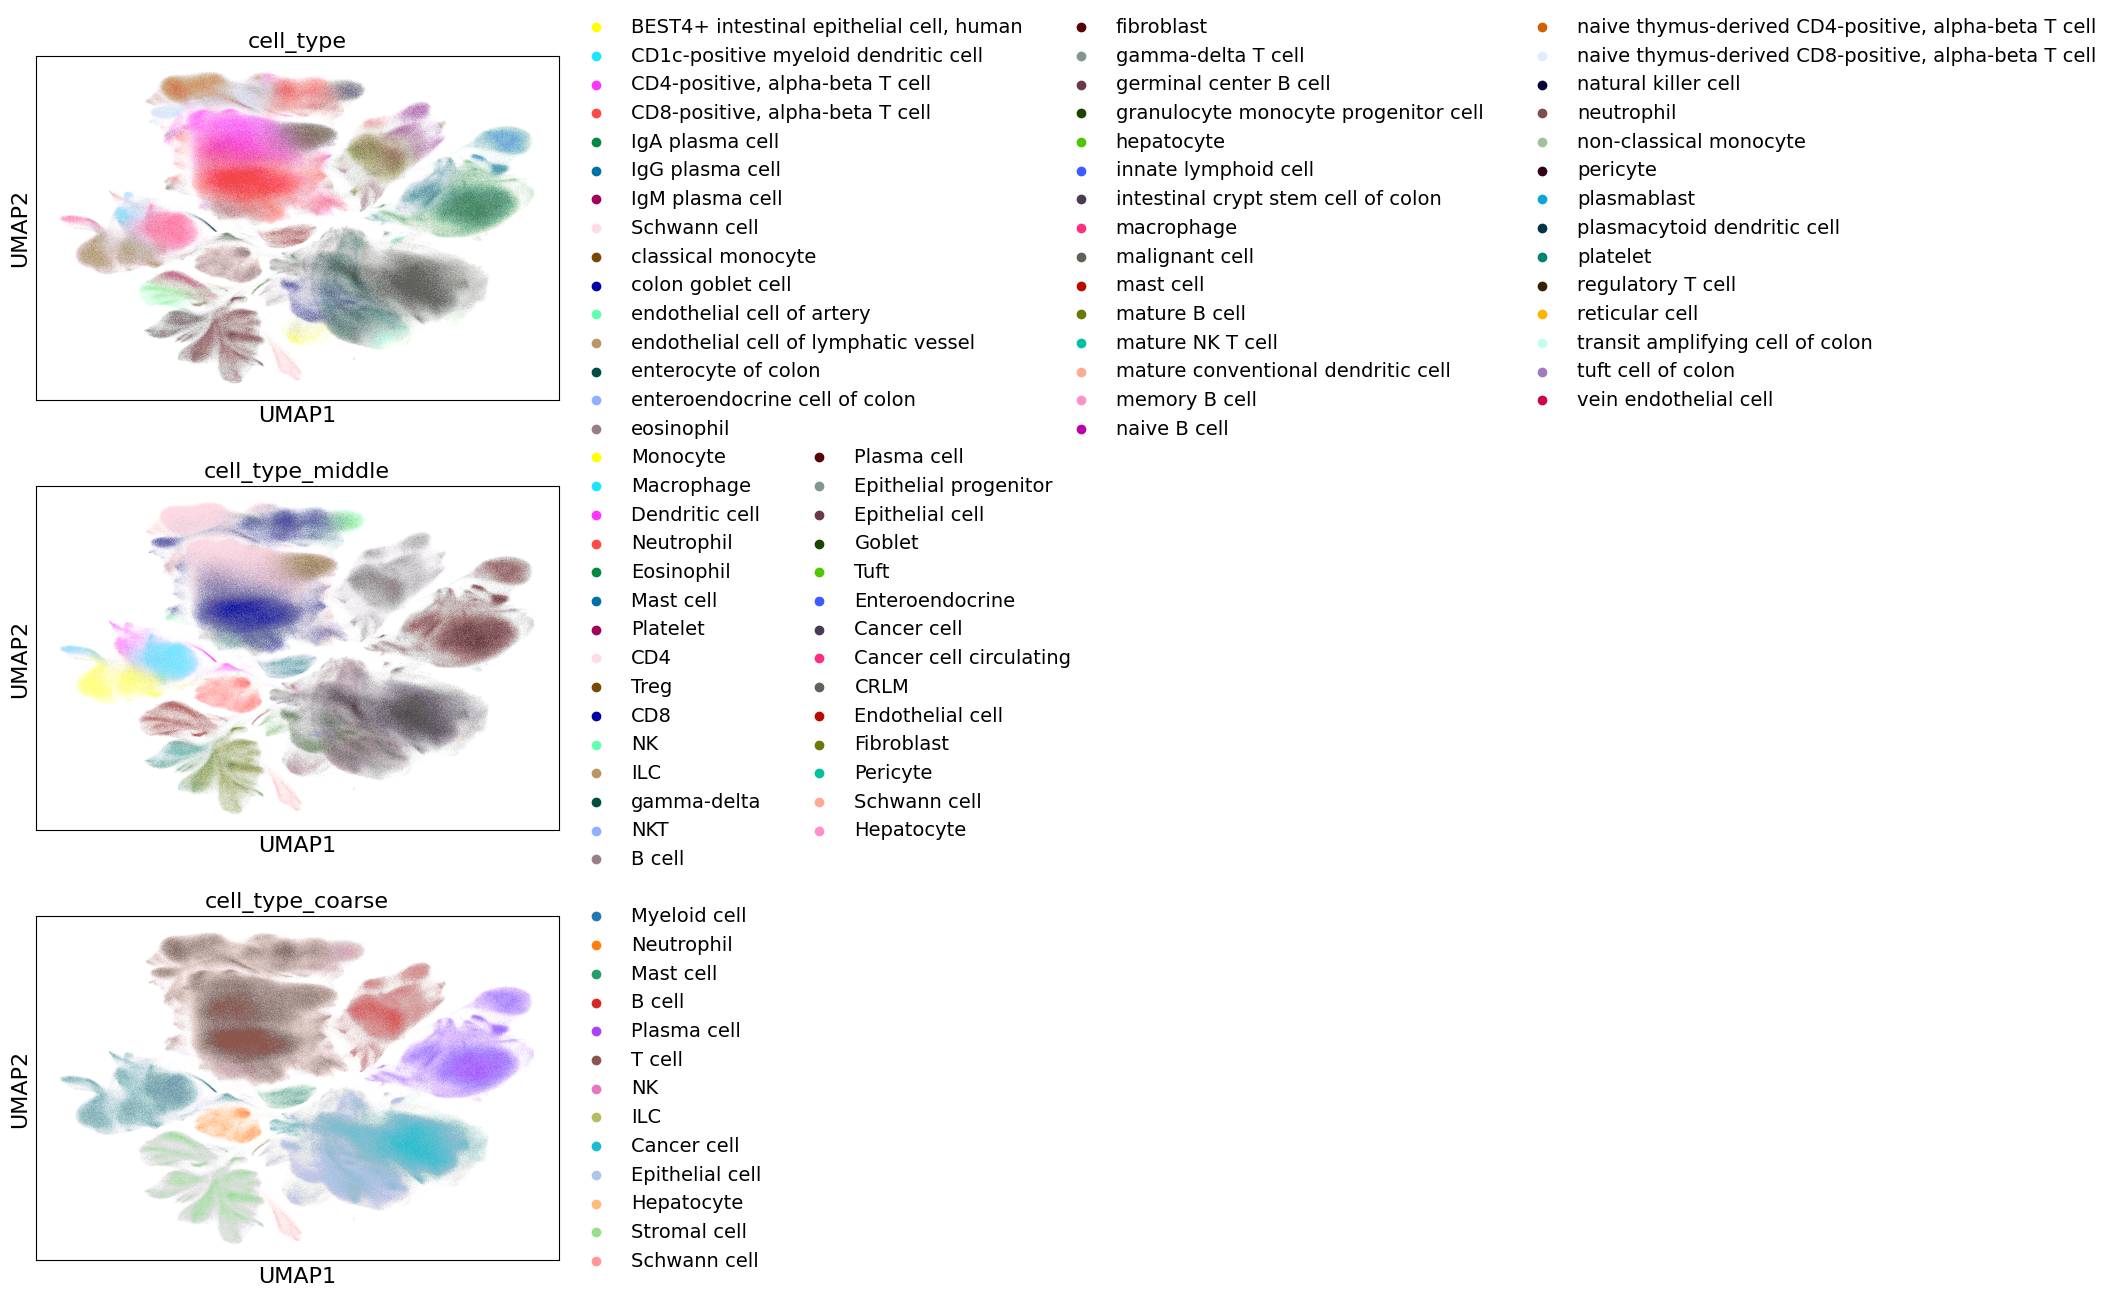

In [22]:
sc.pl.umap(reference, color=["cell_type", "cell_type_middle", "cell_type_coarse"], ncols=1)

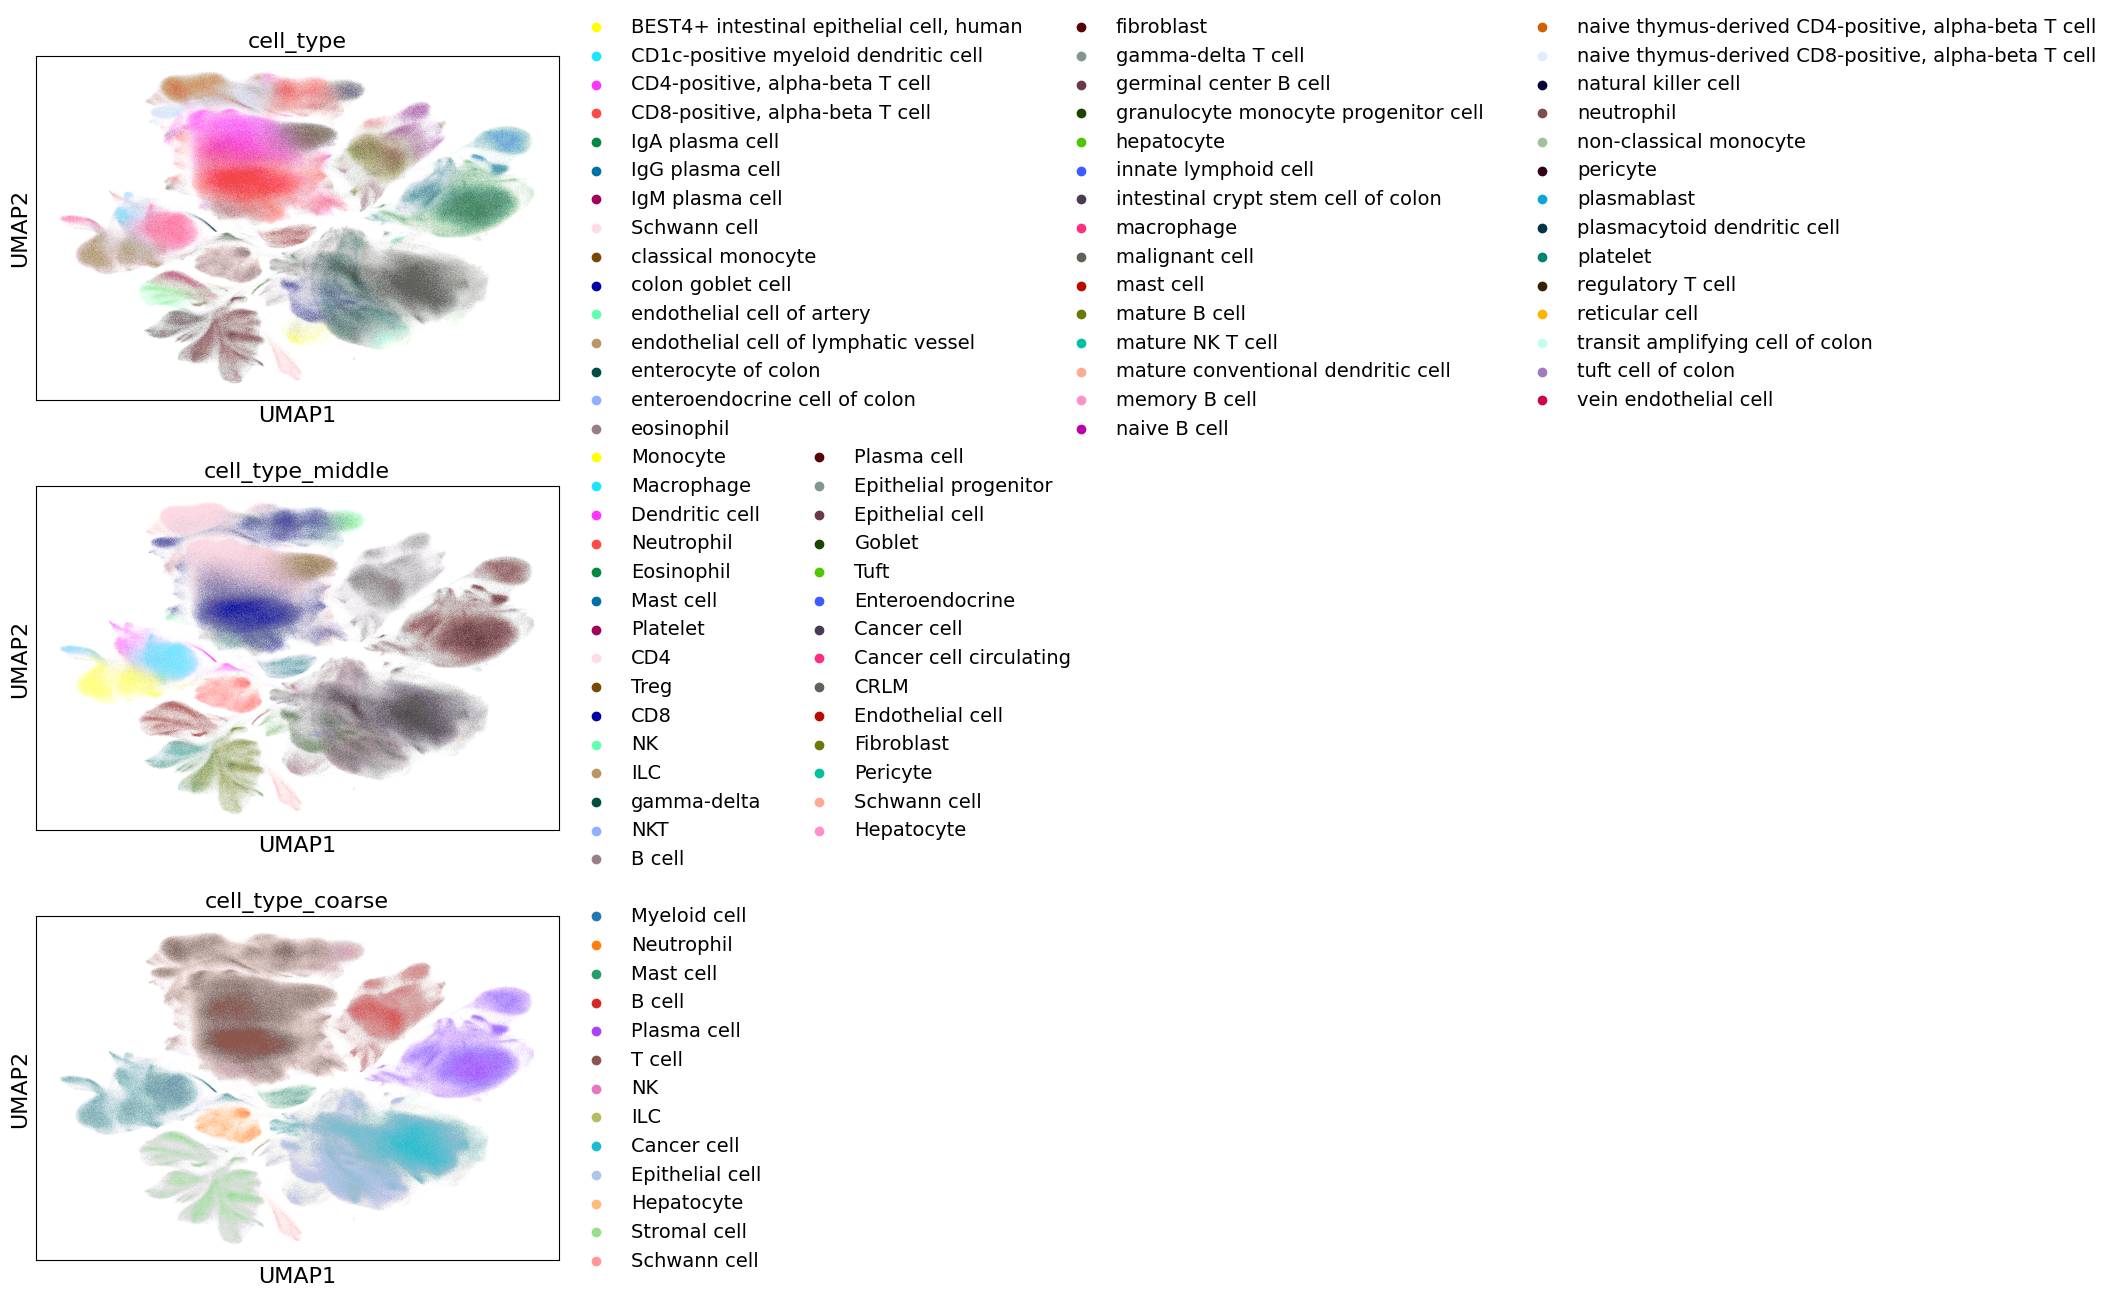

In [54]:
sc.pl.umap(reference, color=["cell_type", "cell_type_middle", "cell_type_coarse"], ncols=1, save="crc_atlas.png")

In [23]:
import celltypist

In [53]:
for n in [200, 1000, 5000, 25000]:
    sampled_cell_index = celltypist.samples.downsample_adata(reference, mode='each', n_cells = n, by = 'cell_type_middle', return_index = True)
    print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")
    sampled_ref = reference[sampled_cell_index].copy()
    sampled_ref.write(ref_path.parent / f"crc_atlas_sampled_max{n}.h5ad")

Number of downsampled cells for training: 28266
Number of downsampled cells for training: 125438
Number of downsampled cells for training: 542811


In [57]:
sampled_ref.var

,var_names,ensembl,Geneid,GeneSymbol,Chromosome,Start,End,Class,Strand,Length,Version,Dataset_25pct_Overlap,n_cells,n_counts,n_cells_by_counts,mean_counts,total_counts,highly_variable
ENSG00000186092,OR4F5,ENSG00000186092,ENSG00000186092.7,OR4F5,chr1,65419.0,71585.0,protein_coding,+,6166.0,gencode.v44,True,168,693,137,0.000107,690.0,False
ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009.6,ENSG00000238009,chr1,89295.0,133723.0,lncRNA,-,44428.0,gencode.v44,True,14782,23065,11021,0.002041,13184.0,False
ENSG00000284733,OR4F29,ENSG00000284733,ENSG00000284733.2,OR4F29,chr1,450740.0,451678.0,protein_coding,-,938.0,gencode.v44,True,14,101,11,0.000015,98.0,False
ENSG00000278791,ENSG00000278791,ENSG00000278791,ENSG00000278791.1,ENSG00000278791,chr1,632325.0,632413.0,miRNA,-,88.0,gencode.v44,True,41004,236173,30119,0.035371,228456.0,False
ENSG00000284662,OR4F16,ENSG00000284662,ENSG00000284662.2,OR4F16,chr1,685716.0,686654.0,protein_coding,-,938.0,gencode.v44,True,19,61,14,0.000009,55.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276700,RNA5-8SN4,ENSG00000276700,ENSG00000276700.1,RNA5-8SN4,KI270733.1,128877.0,129029.0,rRNA,+,152.0,gencode.v44,True,263,910,147,0.000123,794.0,False
ENSG00000275757,5_8S_rRNA-8,ENSG00000275757,ENSG00000275757.1,5_8S_rRNA,KI270733.1,173956.0,174108.0,rRNA,+,152.0,gencode.v44,True,424,1717,250,0.000239,1541.0,False
ENSG00000276017,ENSG00000276017,ENSG00000276017,ENSG00000276017.1,ENSG00000276017,KI270734.1,72411.0,74814.0,protein_coding,+,2403.0,gencode.v44,True,475,2348,429,0.001007,6502.0,False
ENSG00000278817,ENSG00000278817,ENSG00000278817,ENSG00000278817.1,ENSG00000278817,KI270734.1,131494.0,137392.0,protein_coding,+,5898.0,gencode.v44,True,28078,50742,21125,0.007658,49459.0,False


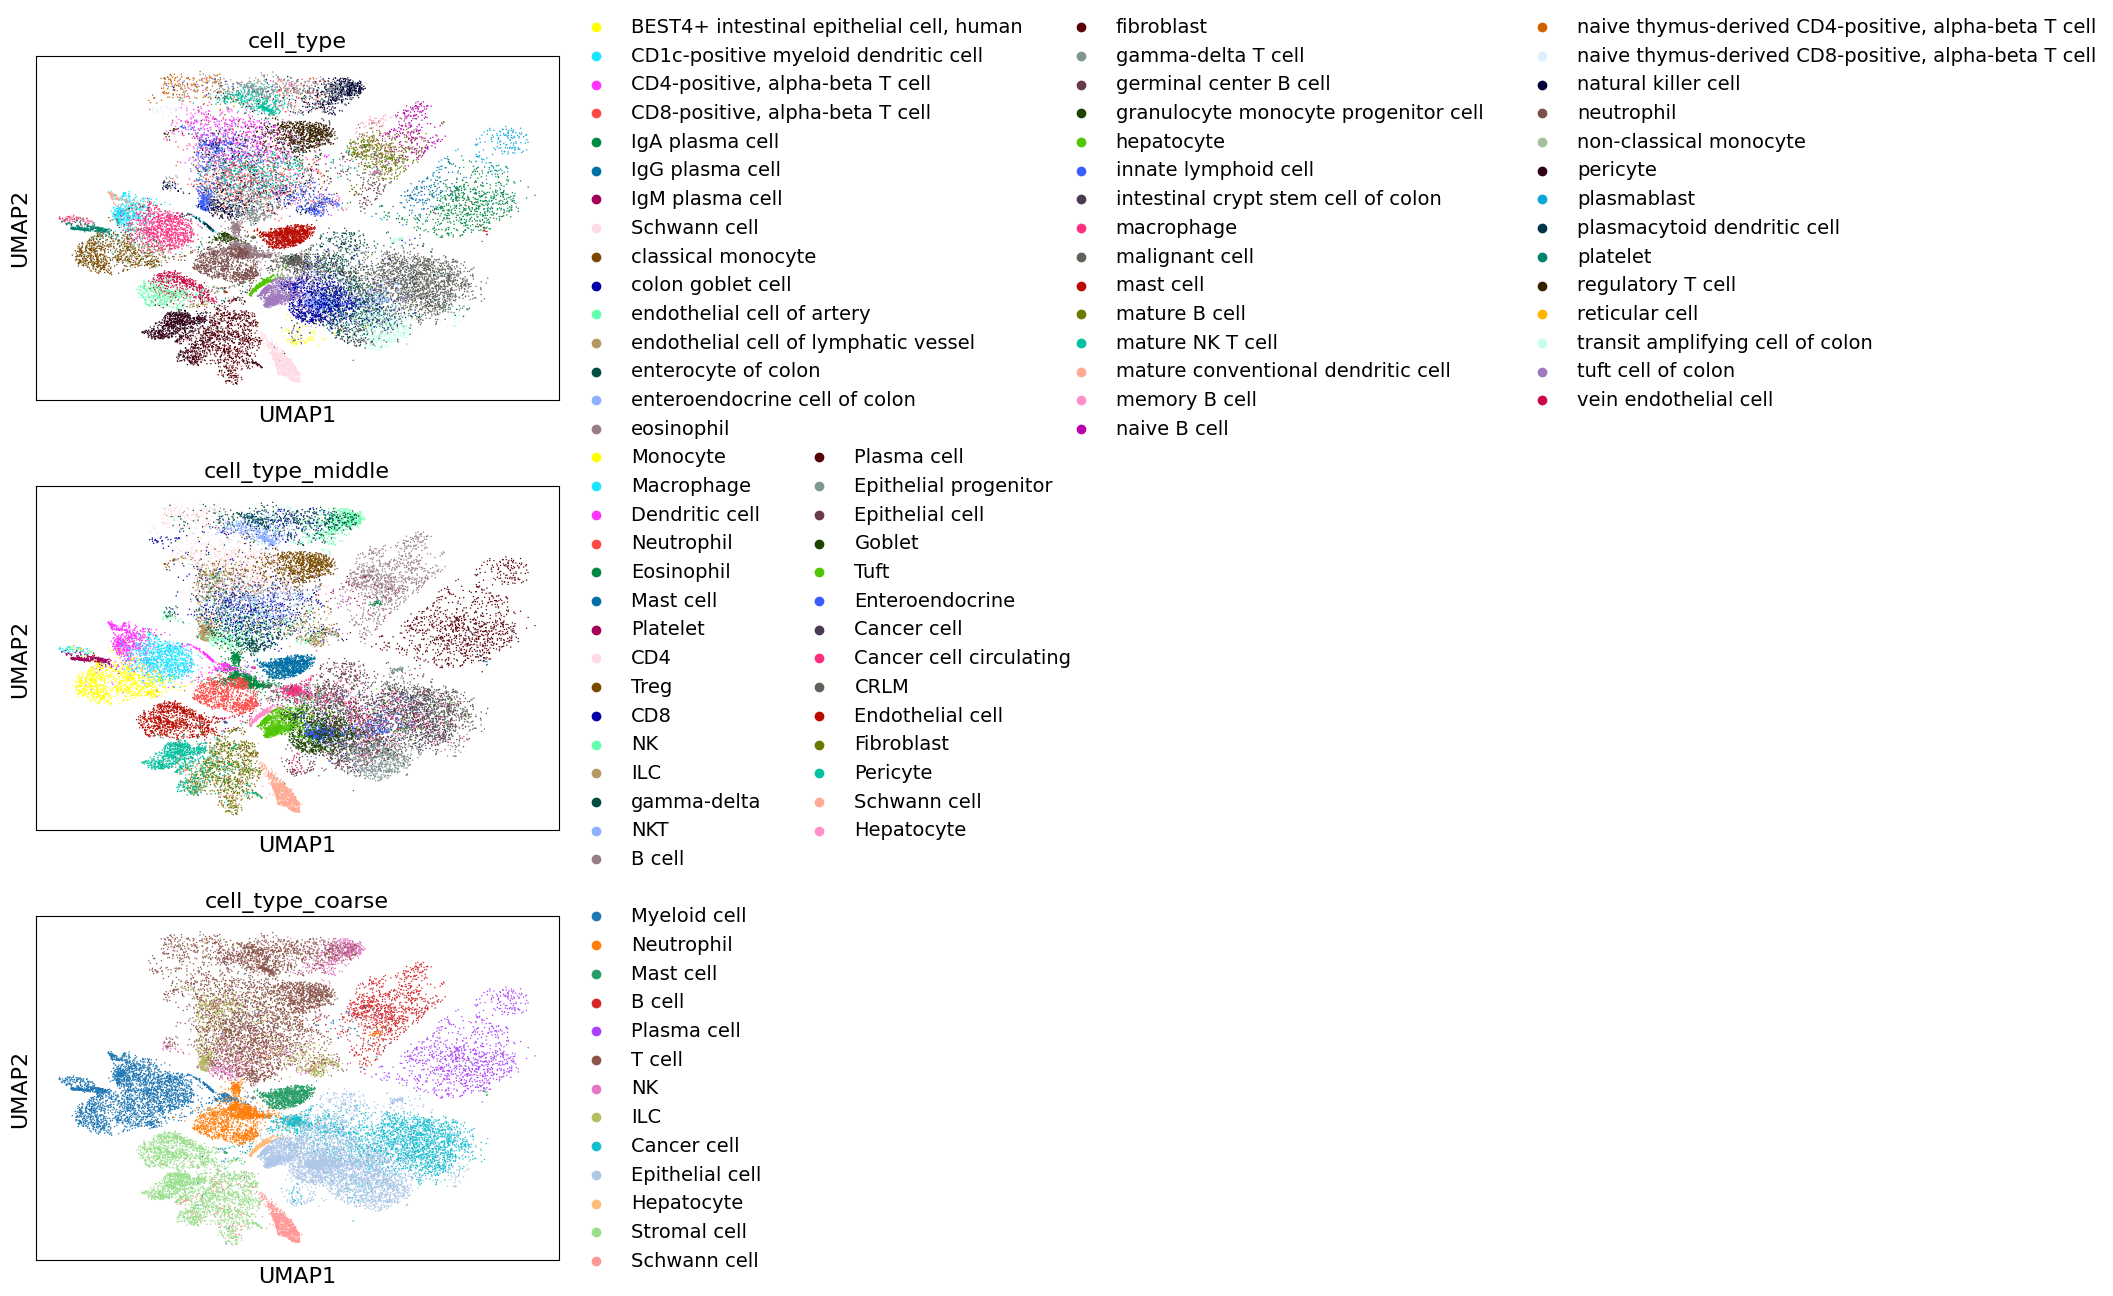

In [37]:
sc.pl.umap(sampled_ref, color=["cell_type", "cell_type_middle", "cell_type_coarse"], ncols=1)

In [39]:
sampled_ref.obs["cell_type_middle"].value_counts()

cell_type_middle
Monocyte                   1000
Macrophage                 1000
Dendritic cell             1000
Neutrophil                 1000
Eosinophil                 1000
Mast cell                  1000
CD4                        1000
Treg                       1000
CD8                        1000
ILC                        1000
NK                         1000
gamma-delta                1000
B cell                     1000
Fibroblast                 1000
Plasma cell                1000
Epithelial progenitor      1000
Epithelial cell            1000
Tuft                       1000
Goblet                     1000
Enteroendocrine            1000
Cancer cell                1000
Schwann cell               1000
Cancer cell circulating    1000
CRLM                       1000
Endothelial cell           1000
Hepatocyte                 1000
Pericyte                   1000
NKT                         870
Platelet                    396
Name: count, dtype: int64